# 7. 인물사진을 만들어 보자

## 7-8. 프로젝트: 인물 모드 문제점 찾기

---

## 목차

### Step 1. 인물모드 직접 해 보기

### Step 2. 사진에서 문제점 찾기

### Step 3. 해결 방법을 제안해 보기

---

- Colab 드라이브 마운트
```python
from google.colab import drive
drive.mount('/content/drive')
```
- Colab 라이브러리 설치
```
!pip install pixellib
```
```
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload
```

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install pixellib

  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 4.1.1
    Uninstalling Pillow-4.1.1:
      Successfully uninstalled Pillow-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

  Using cached Pillow-4.1.1-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.0
    Uninstalling Pillow-9.0.0:
      Successfully uninstalled Pillow-9.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires pillow!=8.3.0,>=5.3.0, but you have pillow 4.1.1 which is incompatible.
scikit-image 0.18.3 requires pillow!=7.1.0,!=7.1.1,>=4.3.0, but you have pillow 4.1.1 which is incompatible.
sahi 0.8.22 requires pillow>=8.2.0, but you have pillow 4.1.1 which is incompatible.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 4.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


- 라이브러리 불러오기

In [4]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

print('슝=3')

슝=3


- DeepLab 모델 불러온 후 생성

In [5]:
MODEL_DIR = 'drive/MyDrive/Colab Notebooks/human_segmentation/models'
MODEL_FILE = os.path.join(MODEL_DIR, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

if not os.path.exists(MODEL_FILE):
    # PixelLib가 제공하는 모델의 url입니다
    MODEL_URL = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

    # 다운로드를 시작합니다
    urllib.request.urlretrieve(MODEL_URL, MODEL_FILE)

In [6]:
# 세그멘테이션 모델 생성
MODEL = semantic_segmentation()
MODEL.load_pascalvoc_model(MODEL_FILE)

- PASCAL VOC 데이터 라벨 종류

In [7]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

### Step 1. 인물모드 직접 해 보기

- 여러분의 셀카를 이용해서 오늘 배운 내용을 수행해 봅시다. 아래와 같은 이미지를 얻어야 합니다. 최소 3장 이상의 인물모드 사진을 만들어 봅시다.
- 인물이 주인공이 아닌, 귀여운 고양이에 대한 아웃포커싱 사진도 만들어 볼 수 있을 것입니다. 시맨틱 세그멘테이션 스텝에서 힌트를 찾아봅시다.
- 배경을 blur하는 인물모드 사진이 아니라 배경사진을 다른 이미지로 교체하는 크로마키 배경 합성을 시도해 볼 수도 있을 것입니다. 여러분만의 환상적인 사진을 만들어 보면 어떨까요?

In [8]:
# seg_color 반환 함수
def get_colormap(label_name):
    # 아래 코드를 이해하지 않아도 좋습니다
    # PixelLib에서 그대로 가져온 코드입니다
    # 주목해야 할 것은 생상 코드 결과물이예요!
    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    # colormap[:20]

    index = LABEL_NAMES.index(label_name)  # 데이터 라벨 인덱스
    seg_color = colormap[index].tolist()  # BGR
    seg_color = seg_color[::-1]  # BGR2RGB
    return seg_color  # RGB

matplotlib 크기 줄이는 방법
- plt.figure(figsize=(w,h))
  - 이미지 그리기 전 설정
  - default_figsize = (6.4, 4.8)
- fig.set_size_inches(w,h)
  - 이미지 그려진 후 설정
- plt.rcParams["figure.figsize"] = (w,h)

In [9]:
# 이미지 1개 그리기
def draw_img(img, img_title='', cmap=None):
    print(img.shape)

    # plt.figure(figsize=(12,12))
    plt.imshow(img, cmap)
    plt.title(img_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.show()

In [10]:
# 이미지 2개 그리기
def draw_imgs(img_1, img_2, img_1_title='', img_2_title=''):
    plt.figure(figsize=(12,8))

    plt.subplot(211)
    plt.imshow(img_1)
    plt.title(img_1_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.subplot(212)
    plt.imshow(img_2)
    plt.title(img_2_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.show()

#### 1. 인물 사진

- 이미지 확인

In [11]:
PERSON_IMG_PATH = 'drive/MyDrive/Colab Notebooks/human_segmentation/images/couple.jpg'
PERSON_IMG_ORIG = cv2.imread(PERSON_IMG_PATH)

(852, 1280, 3)


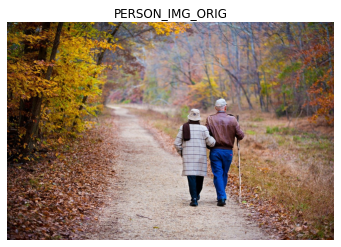

In [12]:
draw_img(cv2.cvtColor(PERSON_IMG_ORIG, cv2.COLOR_BGR2RGB), 'PERSON_IMG_ORIG')

- DeepLab 모델에 이미지 입력 후 출력 확인

In [13]:
# 모델에 이미지 입력
PERSON_SEGVALUES, PERSON_OUTPUT = MODEL.segmentAsPascalvoc(PERSON_IMG_PATH)

In [14]:
# 영역 검출된 클래스 출력
for class_id in PERSON_SEGVALUES['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


(852, 1280, 3)


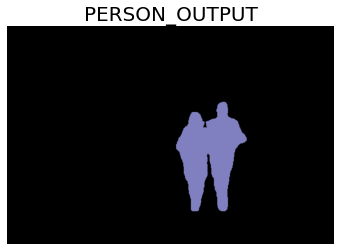

In [15]:
# 모델 출력값 확인
draw_img(PERSON_OUTPUT, 'PERSON_OUTPUT')

- seg_color로만 이루어진 마스크 생성

(852, 1280)


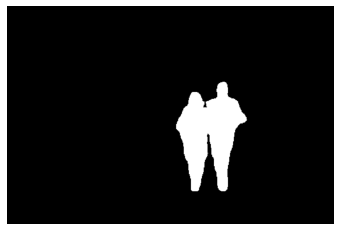

In [16]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_color = get_colormap('person')
person_seg_map = np.all(PERSON_OUTPUT==seg_color, axis=-1)

draw_img(person_seg_map, cmap='gray')

- 원본 이미지와 겹쳐서 세그멘테이션 적용 확인

(852, 1280, 3)


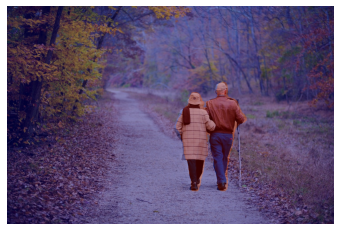

In [17]:
person_img_show = PERSON_IMG_ORIG.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
person_img_mask = person_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
person_color_mask = cv2.applyColorMap(person_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
person_img_show = cv2.addWeighted(person_img_show, 0.6, person_color_mask, 0.4, 0.0)

draw_img(cv2.cvtColor(person_img_show, cv2.COLOR_BGR2RGB))

- 이미지 흐리게 만들기
  - cv2.blur(img, blurring_kernel_size)
    - OpenCV의 blur 함수는 평균 블러링(Averaging Blurring)이다.

(852, 1280, 3)


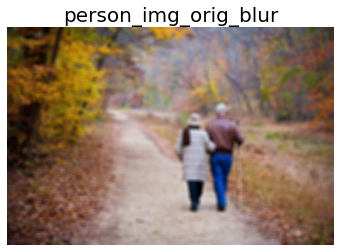

In [18]:
# blurring kernel size = (17,17)
person_img_orig_blur = cv2.blur(PERSON_IMG_ORIG, (17,17))

draw_img(cv2.cvtColor(person_img_orig_blur, cv2.COLOR_BGR2RGB), 'person_img_orig_blur')

- 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
  - 색이 없으면 검게 보이고(0) 색이 있으면 흰색(1)으로 표현됨
    - cv2.bitwise_not(img): 색 반전 => 0은 1로, 1은 0으로 변경
    - cv2.bitwise_and(img_1, img_2): 모두 흰색(1)인 부분만 1로 나타남

-not 연산

|A|not A|
|:---:|:---:|
|1|0|
|0|1|

-and 연산

|A|B|A and B|
|:---:|:---:|:---:|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

(852, 1280, 3)


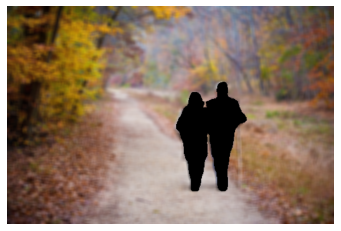

In [19]:
person_img_mask_color = cv2.cvtColor(person_img_mask, cv2.COLOR_GRAY2BGR)
person_img_bg_mask = cv2.bitwise_not(person_img_mask_color)
person_img_bg_blur = cv2.bitwise_and(person_img_orig_blur, person_img_bg_mask)

draw_img(cv2.cvtColor(person_img_bg_blur, cv2.COLOR_BGR2RGB))

- 배경 이미지와 사람 이미지 합치기
  - numpy.where(condition,[x,y])
    - 입력 조건을 충족하는 배열의 색인을 생성
    - 조건이 True이면 출력에 x의 요소가 포함되고, 그렇지 않으면 출력에 y의 요소가 포함된다.

(852, 1280, 3)


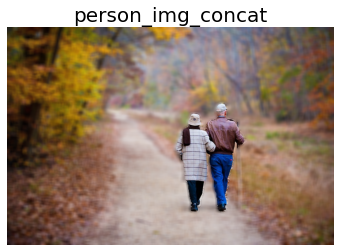

In [20]:
person_img_concat = np.where(person_img_mask_color==255, PERSON_IMG_ORIG, person_img_bg_blur)

draw_img(cv2.cvtColor(person_img_concat, cv2.COLOR_BGR2RGB), 'person_img_concat')

- 이미지 처리 결과 저장

In [21]:
# cf. plt.savefig() 는 plt.show() 직전에 해야 처리가 끝난 이미지 저장이 제대로 된다.
# plt.savefig('image.png', bbox_inches='tight',pad_inches = 0) 로 저장했더니 공백 및 테두리 숨기기가 제대로 안 됨 => plt.imsave('image.png', img)를 사용함
plt.imsave('drive/MyDrive/Colab Notebooks/result_imgs/person_blur.png', cv2.cvtColor(person_img_concat, cv2.COLOR_BGR2RGB))

- blur 적용 전후 비교

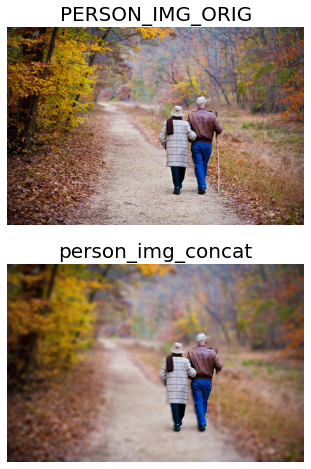

In [22]:
draw_imgs(cv2.cvtColor(PERSON_IMG_ORIG, cv2.COLOR_BGR2RGB), cv2.cvtColor(person_img_concat, cv2.COLOR_BGR2RGB), 'PERSON_IMG_ORIG', 'person_img_concat')

#### 2. 고양이 사진

- 이미지 확인

In [23]:
CAT_IMG_PATH = 'drive/MyDrive/Colab Notebooks/human_segmentation/images/cat_1280x853.jpg'  
CAT_IMG_ORIG = cv2.imread(CAT_IMG_PATH) 

(853, 1280, 3)


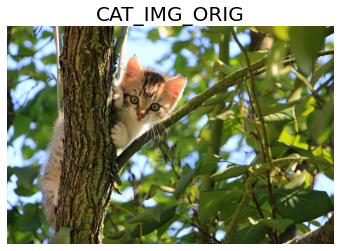

In [24]:
draw_img(cv2.cvtColor(CAT_IMG_ORIG, cv2.COLOR_BGR2RGB), 'CAT_IMG_ORIG')

- DeepLab 모델에 이미지 입력 후 출력 확인

In [25]:
# 모델에 이미지 입력
CAT_SEGVALUES, CAT_OUTPUT = MODEL.segmentAsPascalvoc(CAT_IMG_PATH)

In [26]:
# 영역 검출된 클래스 출력
for class_id in CAT_SEGVALUES['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


(853, 1280, 3)


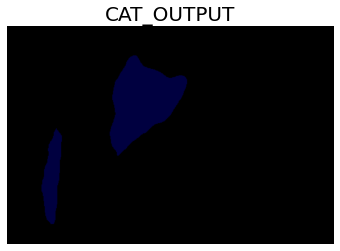

In [27]:
# 모델 출력값 확인
draw_img(CAT_OUTPUT, 'CAT_OUTPUT')

- seg_color로만 이루어진 마스크 생성

(853, 1280)


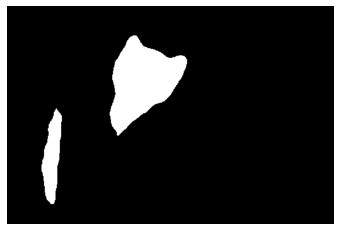

In [28]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_color = get_colormap('cat')
cat_seg_map = np.all(CAT_OUTPUT==seg_color, axis=-1)

draw_img(cat_seg_map, cmap='gray')

- 원본 이미지와 겹쳐서 세그멘테이션 적용 확인

(853, 1280, 3)


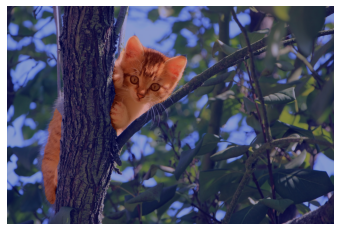

In [29]:
cat_img_show = CAT_IMG_ORIG.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
cat_img_mask = cat_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
cat_color_mask = cv2.applyColorMap(cat_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
cat_img_show = cv2.addWeighted(cat_img_show, 0.6, cat_color_mask, 0.4, 0.0)

draw_img(cv2.cvtColor(cat_img_show, cv2.COLOR_BGR2RGB))

- 이미지 흐리게 만들기
  - cv2.blur(img, blurring_kernel_size)
    - OpenCV의 blur 함수는 평균 블러링(Averaging Blurring)이다.

(853, 1280, 3)


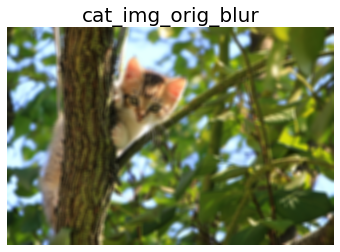

In [30]:
# blurring kernel size = (17,17)
cat_img_orig_blur = cv2.blur(CAT_IMG_ORIG, (17,17))

draw_img(cv2.cvtColor(cat_img_orig_blur, cv2.COLOR_BGR2RGB), 'cat_img_orig_blur')

- 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출
  - 색이 없으면 검게 보이고(0) 색이 있으면 흰색(1)으로 표현됨
    - cv2.bitwise_not(img): 색 반전 => 0은 1로, 1은 0으로 변경
    - cv2.bitwise_and(img_1, img_2): 모두 흰색(1)인 부분만 1로 나타남

-not 연산

|A|not A|
|:---:|:---:|
|1|0|
|0|1|

-and 연산

|A|B|A and B|
|:---:|:---:|:---:|
|0|0|0|
|1|0|0|
|0|1|0|
|1|1|1|

(853, 1280, 3)


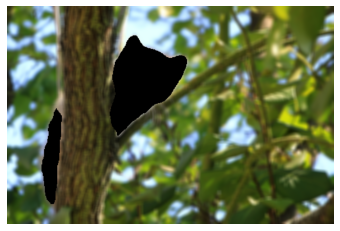

In [31]:
cat_img_mask_color = cv2.cvtColor(cat_img_mask, cv2.COLOR_GRAY2BGR)
cat_img_bg_mask = cv2.bitwise_not(cat_img_mask_color)
cat_img_bg_blur = cv2.bitwise_and(cat_img_orig_blur, cat_img_bg_mask)

draw_img(cv2.cvtColor(cat_img_bg_blur, cv2.COLOR_BGR2RGB))

- 배경 이미지와 고양이 이미지 합치기
  - numpy.where(condition,[x,y])
    - 입력 조건을 충족하는 배열의 색인을 생성
    - 조건이 True이면 출력에 x의 요소가 포함되고, 그렇지 않으면 출력에 y의 요소가 포함된다.

(853, 1280, 3)


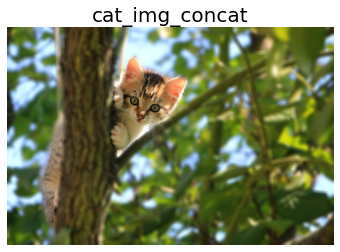

In [32]:
cat_img_concat = np.where(cat_img_mask_color==255, CAT_IMG_ORIG, cat_img_bg_blur)

draw_img(cv2.cvtColor(cat_img_concat, cv2.COLOR_BGR2RGB), 'cat_img_concat')

- 이미지 처리 결과 저장

In [33]:
# cf. plt.savefig() 는 plt.show() 직전에 해야 처리가 끝난 이미지 저장이 제대로 된다.
# plt.savefig('image.png', bbox_inches='tight',pad_inches = 0) 로는 공백 및 테두리 숨기기가 제대로 안 됐기에 plt.imsave('image.png', img)를 사용함
plt.imsave("drive/MyDrive/Colab Notebooks/result_imgs/cat_blur.png", cv2.cvtColor(cat_img_concat, cv2.COLOR_BGR2RGB))

- blur 적용 전후 비교

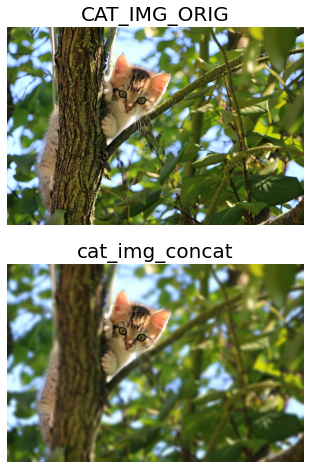

In [34]:
draw_imgs(cv2.cvtColor(CAT_IMG_ORIG, cv2.COLOR_BGR2RGB), cv2.cvtColor(cat_img_concat, cv2.COLOR_BGR2RGB), 'CAT_IMG_ORIG', 'cat_img_concat')

#### 3. 배경전환 크로마키 사진

**나의 요구사항: 배경 이미지에 있는 커튼에 고양이가 매달려 있게 만들 것이다. 매우 귀여울 것이기 때문!**

- 배경 이미지 확인

In [35]:
BACK_IMG_PATH = 'drive/MyDrive/Colab Notebooks/human_segmentation/images/pforphoto.jpg'  
BACK_IMG_ORIG = cv2.imread(BACK_IMG_PATH)

(852, 1280, 3)


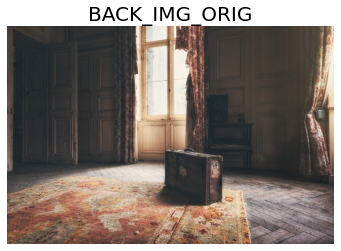

In [36]:
draw_img(cv2.cvtColor(BACK_IMG_ORIG, cv2.COLOR_BGR2RGB), 'BACK_IMG_ORIG')

- 고양이 사진 크기 변경
  - cv2.resize(img, (w,h), interpolation)
    - interpolation 종류: cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4, cv2.INTER_AREA

|interpolation|설명|
|:---:|:---:|
|cv2.INTER_NEAREST|최근방 이웃 보간법|
|cv2.INTER_LINEAR|양선형 보간법(2x2 이웃 픽셀 참조)|
|cv2.INTER_CUBIC|3차회선 보간법(4x4 이웃 픽셀 참조)|
|cv2.INTER_LANCZOS4|Lanczos 보간법 (8x8 이웃 픽셀 참조)|
|cv2.INTER_AREA|영상 축소시 효과적|

In [37]:
# 고양이만 남기고 나머지는 0(검은색) 처리
cat_only_img_concat = np.where(cat_img_mask_color==255, CAT_IMG_ORIG, 0)

# 고양이 resize
h, w, c = cat_only_img_concat.shape
cat_img_resize = cv2.resize(cat_only_img_concat, (w//4, h//4), cv2.INTER_AREA)

(213, 320, 3)


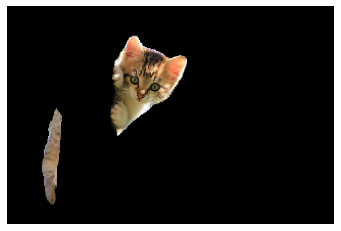

In [38]:
draw_img(cv2.cvtColor(cat_img_resize, cv2.COLOR_BGR2RGB))

- 배경 이미지와 고양이 이미지 합치기
  - numpy.where(condition,[x,y])
    - 입력 조건을 충족하는 배열의 색인을 생성
    - 조건이 True이면 출력에 x의 요소가 포함되고, 그렇지 않으면 출력에 y의 요소가 포함된다.
  - cv2.addWeighted(img_1, a, img_2, b, c)
    - result = img_1 * a + img_2 * b + c
    - b = 1 - a
  - [E-03]에서 사용했던 코드 재활용

In [39]:
back_img_show = BACK_IMG_ORIG.copy()

refined_y = 200
refined_x = 400

alpha = 0.2  # 투명도
sticker_area = back_img_show[refined_y:refined_y+cat_img_resize.shape[0], refined_x:refined_x+cat_img_resize.shape[1]]
back_img_show[refined_y:refined_y +cat_img_resize.shape[0], refined_x:refined_x+cat_img_resize.shape[1]] = \
cv2.addWeighted(sticker_area, alpha, np.where(cat_img_resize==0,sticker_area,cat_img_resize).astype(np.uint8), 1-alpha, 0)  # 컬러 값 0(검은색)

(852, 1280, 3)


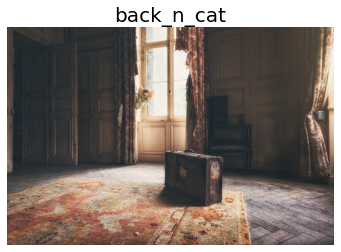

In [40]:
draw_img(cv2.cvtColor(back_img_show, cv2.COLOR_BGR2RGB), 'back_n_cat')

- 이미지 처리 결과 저장

In [41]:
# cf. plt.savefig() 는 plt.show() 직전에 해야 처리가 끝난 이미지 저장이 제대로 된다.
# plt.savefig('image.png', bbox_inches='tight',pad_inches = 0) 로는 공백 및 테두리 숨기기가 제대로 안 됐기에 plt.imsave('image.png', img)를 사용함
plt.imsave("drive/MyDrive/Colab Notebooks/result_imgs/back_n_cat.png", cv2.cvtColor(back_img_show, cv2.COLOR_BGR2RGB))

- 합치기 전후 비교

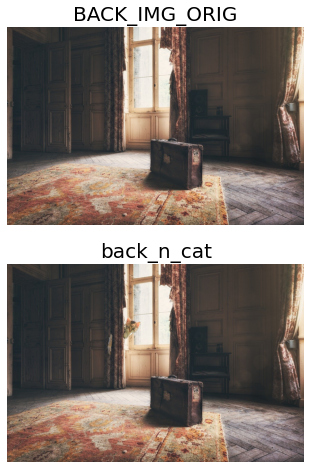

In [42]:
draw_imgs(cv2.cvtColor(BACK_IMG_ORIG, cv2.COLOR_BGR2RGB), cv2.cvtColor(back_img_show, cv2.COLOR_BGR2RGB), 'BACK_IMG_ORIG', 'back_n_cat')

귀엽게 완성되었다!

![](result_imgs/back_n_cat.png)

### Step 2. 사진에서 문제점 찾기

- 사람 이미지의 경계선 처리가 깔끔하지 못하다.

![](result_imgs/inked_person_blur.jpg)

- 고양이 이미지는 어느 정도 자연스럽게 처리되었다! 경계선이 살짝 진하지만 괜찮다.

![](result_imgs/inkded_cat_blur.jpg)

### Step 3. 해결 방법을 제안해 보기

인물모드 사진의 문제점을 해결할 방안 제시하기
- 단순히 'XXX 기술을 사용한다.' 정도의 선언적 솔루션 X
- => 내가 선택한 기술이 DeepLab 모델의 Semantic Segmentation 이 만들어 낸 Mask 영역에 어떻게 적용되어 문제점을 보완하게 되는지의 메커니즘이 포함된 솔루션 O

#### My Solution

경계선이 자연스러워 보일 수 있는 방법 생각/검색/시도한 목록

1. 엣지 검출 전 샤프닝 적용
2. 엣지 검출하기 위해 캐니엣지 적용: cv2.Canny(img, 임계값, 임계값)
3. 블러링 함수로 cv2.blur() 대신 다른 함수 사용해보기
4. 배경 제거 함수로 cv2.bgsegm.createBackgroundSubtractorMOG(history, nmixtures, backgroundRatio, noiseSigma) 사용해보기

=> 전부 실패했다. 

5. 아예 다른 모델 사용하기: MODNet - 배경 제거 및 사람 검출 결과가 괜찮음 [참고](https://www.linkedin.com/pulse/modnet-remove-background-real-time-demo-code-included-sobh-phd)

- 엣지 검출 전 샤프닝 적용

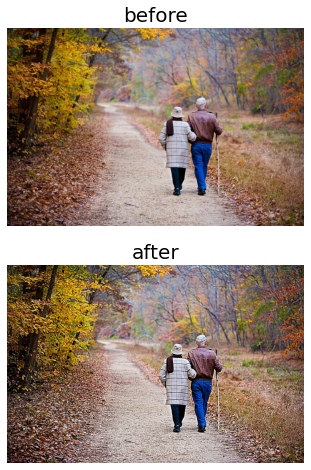

In [43]:
# 언샤프 마스크 필터링 https://deep-learning-study.tistory.com/155

img = cv2.imread(PERSON_IMG_PATH, cv2.COLOR_BGR2GRAY)
blr = cv2.GaussianBlur(img, (0, 0), 2) # 표준편차 2, 필터 크기는 자동 설정

a = 2.0 # 샤프닝 정도 결정하는 변수
dst = np.clip((1+a)*img - a * blr, 0, 255).astype(np.uint8) # 계산은 정수, 출력은 실수

draw_imgs(cv2.cvtColor(PERSON_IMG_ORIG, cv2.COLOR_BGR2RGB), cv2.cvtColor(dst, cv2.COLOR_BGR2RGB), 'before', 'after')

plt.imsave('drive/MyDrive/Colab Notebooks/result_imgs/person_sharpening.png', cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

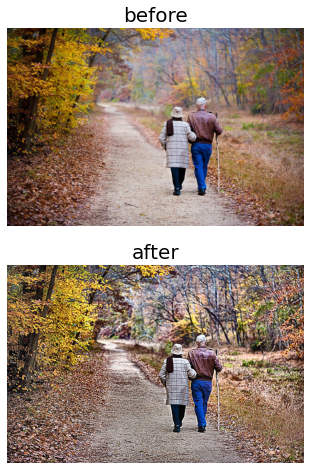

In [44]:
# 이미지 대조 색상 강조하기 https://ansan-survivor.tistory.com/311

''' 함수) 이미지를 더 선명하게 Contrast(대조) 기법을 적용시킴.
param : 컬러 이미지
return : 대조된 이미지
'''

def img_Contrast(img):
    # -----Converting image to LAB Color model-----------------------------------
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    
    # -----Splitting the LAB image to different channels-------------------------
    l, a, b = cv2.split(lab)
    
    # -----Applying CLAHE to L-channel-------------------------------------------
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)
    
    # -----Merge the CLAHE enhanced L-channel with the a and b channel-----------
    limg = cv2.merge((cl, a, b))
    
    # -----Converting image from LAB Color model to RGB model--------------------
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)
    return final

img = cv2.imread('drive/MyDrive/Colab Notebooks/result_imgs/person_sharpening.png', cv2.COLOR_BGR2GRAY)
img = img_Contrast(img)

draw_imgs(cv2.cvtColor(PERSON_IMG_ORIG, cv2.COLOR_BGR2RGB), cv2.cvtColor(img, cv2.COLOR_BGR2RGB), 'before', 'after')

plt.imsave("drive/MyDrive/Colab Notebooks/result_imgs/person_contrast.png", cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

- 보행자 검출을 위한 HOG
    - 이미지가 아니라 영상에서 사람을 검출하기 위한 용도의 코드지만 혹시나 사용해봤다. 역시 제대로 작동하지 않았다.

()


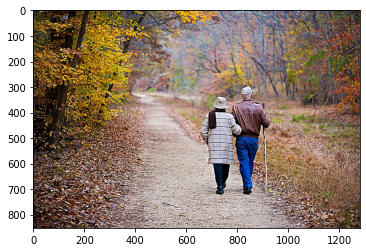

In [45]:
import random
import sys

# 동영상 불러오기
# img = cv2.imread('human_segmentation/images/couple.jpg', cv2.COLOR_BGR2RGB)
img = dst.copy()

# 보행자 검출을 위한 HOG 기술자 설정
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# 매 프레임마다 보행자 검출
detected, _ = hog.detectMultiScale(img) # 사각형 정보를 받아옴
print(detected)

# 검출 결과 화면 표시
for (x, y, w, h) in detected:
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.rectangle(img, (x, y, w, h), c, 3)

####
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

- 엣지 검출 좀 더 정확히 해보기

(852, 1280, 3)


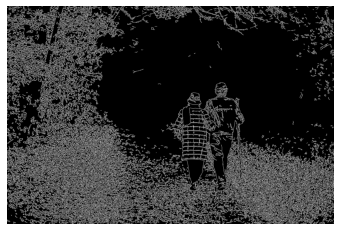

In [46]:
# 캐니 엣지 적용
edged = cv2.Canny(img, 300, 600)  # 하단 임계값과 상단 임계값은 실험적으로 결정하기

draw_img(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

plt.imsave("drive/MyDrive/Colab Notebooks/result_imgs/person_canny_edge.png", cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

- 블러링 함수로 cv2.blur() 대신 다른 함수 사용해보기
    - cv2.GaussianBlur()
    - cv2.MedianBlur()

기존 cv2.blur() 함수에 비해 딱히 달라진 것을 찾을 수 없음

background
person
(852, 1280, 3)


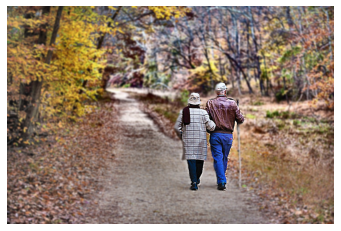

In [47]:
# 이미지 불러오기
img_path = 'drive/MyDrive/Colab Notebooks/result_imgs/person_contrast.png'
img = cv2.imread(img_path, cv2.COLOR_BGR2GRAY)
img = img_Contrast(img)


# DeepLab 모델에 이미지 입력 후 출력
person_2_segvalues, person_2_output = MODEL.segmentAsPascalvoc(img_path)
for class_id in person_2_segvalues['class_ids']:
    print(LABEL_NAMES[class_id])
# draw_img(cv2.cvtColor(person_2_output, cv2.COLOR_BGR2RGB), 'person_2_output')


# seg_color로만 이루어진 마스크 생성
seg_color = get_colormap('person')
person_2_seg_map = np.all(person_2_output==seg_color, axis=-1)


# True와 Flase인 값을 각각 255와 0으로 변경
person_2_img_mask = person_2_seg_map.astype(np.uint8) * 255


# 이미지 블러링
# person_2_img_orig_blur = cv2.medianBlur(img, 21)
person_2_img_orig_blur = cv2.GaussianBlur(img, (15,15), 0)


# 세그멘테이션 마스크를 이용하여 배경만 추출
person_2_img_mask_color = cv2.cvtColor(person_2_img_mask, cv2.COLOR_GRAY2BGR)
person_2_img_bg_mask = cv2.bitwise_not(person_2_img_mask_color)
person_2_img_bg_blur = cv2.bitwise_and(person_2_img_orig_blur, person_2_img_bg_mask)
# draw_img(cv2.cvtColor(person_2_img_bg_blur, cv2.COLOR_BGR2RGB))


# 배경 이미지와 사람 이미지 합치기
person_2_img_concat = np.where(person_2_img_mask_color==255, img, person_2_img_bg_blur)
draw_img(cv2.cvtColor(person_2_img_concat, cv2.COLOR_BGR2RGB))


# 이미지 처리 결과 저장
plt.imsave("drive/MyDrive/Colab Notebooks/result_imgs/person_gaussian_blur.png", cv2.cvtColor(person_2_img_concat, cv2.COLOR_BGR2RGB))

결과 비교

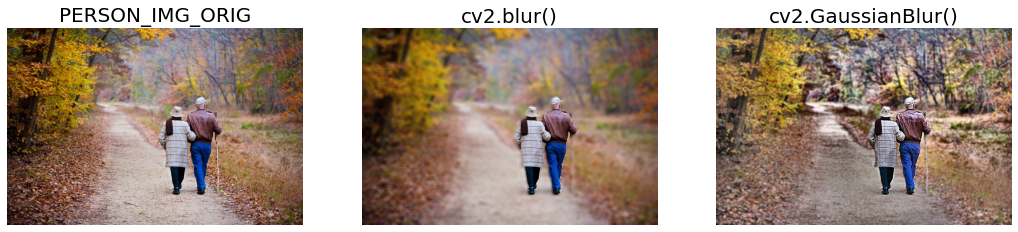

In [48]:
plt.figure(figsize=(18,12))

plt.subplot(131)
plt.imshow(cv2.cvtColor(PERSON_IMG_ORIG, cv2.COLOR_BGR2RGB))
plt.title('PERSON_IMG_ORIG')
plt.rc('axes', titlesize=20)
plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.cvtColor(person_img_concat, cv2.COLOR_BGR2RGB))
plt.title('cv2.blur()')
plt.rc('axes', titlesize=20)
plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.cvtColor(person_2_img_concat, cv2.COLOR_BGR2RGB))
plt.title('cv2.GaussianBlur()')
plt.rc('axes', titlesize=20)
plt.axis('off')

plt.show()

- 배경 제거 함수로 cv2.bgsegm.createBackgroundSubtractorMOG(history, nmixtures, backgroundRatio, noiseSigma) 사용해보기
  - python3에서는 cv2.createBackgroundSubtractorMOG2()를 써야 함
  - 작동하지 않음!
  - 원래 이미지가 아니라 영상에서 사용하던 함수여서 그런 듯하다.

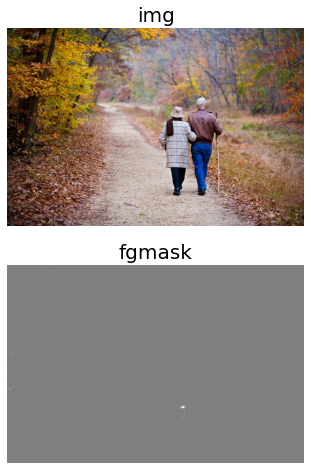

In [49]:
fgbg = cv2.createBackgroundSubtractorMOG2()

fgmask = fgbg.apply(PERSON_IMG_ORIG)

draw_imgs(cv2.cvtColor(PERSON_IMG_ORIG, cv2.COLOR_BGR2RGB), cv2.cvtColor(fgmask, cv2.COLOR_BGR2RGB), 'img', 'fgmask')

- MODNet 모델 사용해보기

MODNet: Is a Green Screen Really Necessary for Real-Time Portrait Matting?은 이미 제목에 드러난 것처럼 Green Screen 없이 Portrait matting을 하기 위해 제안된 딥러닝 모델이다.

MODNet은 하나의 RGB 이미지를 입력값로 사용하고, 단일 모델로 실시간 Portrait matting을 수행해 배경을 제거해주는 모델이다.

이러한 과정은 세 단계로 나누어져 진행된다.
1.Semantic estimation
2.Detail prediction
3.Semantic-detail fusion

Semantic estimation을 통해 거친 전경 마스크(Coarse foreground mask)을 예측하고, Detail prediction에서 세밀한 전경의 가장자리를 예측한다. 마지막으로 Semantic-detail fusion 단계는 이름처럼 두 하위 목표의 예측값인 Semantic과 Detail을 합쳐 최종 alpha matte 값을 예측한다.

![](https://miro.medium.com/max/2000/1*UOtVvKmBB7MCrPdBcpPs1Q.png)

[출처: MODNet: Is a Green Screen Really Necessary for Real-Time Portrait Matting? 논문 리뷰](https://medium.com/ddiddu-log/modnet-is-a-green-screen-really-necessary-for-real-time-portrait-matting-%EB%85%BC%EB%AC%B8%EB%A6%AC%EB%B7%B0-e3eb27898b69)


#### **MODNet 으로 배경을 제외한 사람 검출 결과는 아래 사진과 같다.**

[사용한 주피터 노트북](https://drive.google.com/file/d/1Joi9gQG-lUyBxZOs5whKdDCOaj45fon2/view?usp=sharing)

![](result_imgs/MODNet result.png)



---

# 회고

### - 이번 프로젝트에서 **어려웠던 점**.
저작권 없는 이미지 사이트에서 사진 고르느라 시간 다 뺏겼다. 기존의 모델에서 뭘 해줘야 경계선을 자연스럽게 만들 수 있는 건지 잘 모르겠다.

### - 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
- 파일 크기가 커지면 깃허브에서 열리지 않으므로 사진 크기 조절이 필요하다.
- matplotlib.imsave() 함수로 결과 이미지를 저장할 수 있다.
- green screen 없이 portrait matting 할 수 있는 MODNet 모델을 알게 되었다.
- Image Blurring [참고1](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html) [참고2](https://opencv-python.readthedocs.io/en/latest/doc/11.imageSmoothing/imageSmoothing.html)
  - Image Blurring == Image Smoothing
  - 용도: 노이즈 제거, 경계선 흐리게 만들기
  - OpenCV에는 4가지 blurring 방법 제공
    - Averaging
      - Box형태의 kernel을 이미지에 적용한 후 평균값을 box의 중심점에 적용하는 형태
      - 커널
        - box filter는 동일한 값으로 구성된 kernel 사용
        - e.g. 3x3 box kernel: $K = \frac{1}{9} \begin{bmatrix}1&1&1\\1&1&1\\1&1&1 \end{bmatrix}$
      - 함수
        - cv2.blur(src, ksize) → dst: 정규화된 box filter로 이미지 컨볼루젼
        - cv2.boxFilter(src, ksize): 정규화되지 않은 box filter로 이미지 컨볼루젼
    - Gaussian Filtering
      - kernel 행렬의 값을 Gaussian 함수를 통해서 수학적으로 생성하여 적용
      - kernel의 사이즈 = 양수 + 홀수로 지정
      - 이미지의 [Gaussian Noise](https://en.wikipedia.org/wiki/Gaussian_noise) (전체적으로 밀도가 동일한 노이즈, 백색노이즈)를 제거하는 데 가장 효과적
      - cv2.GaussianBlur(img, ksize, sigmaX)
    - Median Filtering
      - kernel window와 pixel의 값들을 정렬한 후에 중간값을 선택하여 적용
      - [salt-and-pepper noise](https://ko.wikipedia.org/wiki/%EC%A0%90%EC%9E%A1%EC%9D%8C) 제거에 가장 효과적
      - cv2.medianBlur(src, ksize)
    - Bilateral Filtering
      - Bilateral Filtering(양방향 필터)은 경계선을 유지(경계선 흐려짐X)하면서 Gaussian Blur처리
      - cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)

### - 루브릭 평가 지표를 맞추기 위해 **시도한 것들**.

>#### **루브릭**
>|평가문항|상세기준|
>|:---:|:---:|
>|1. 인물모드 사진을 성공적으로 제작하였다.|아웃포커싱 효과가 적용된 본인의 인물모드 사진과 고양이 사진, 배경전환 크로마키사진을 각각 1장 이상 성공적으로 제작하였다.|
>|2. 제작한 인물모드 사진들에서 나타나는 문제점을 정확히 지적하였다.|인물사진에서 발생한 문제점을 정확히 지적한 사진을 제출하였다.|
>|3. 인물모드 사진의 문제점을 개선할 수 있는 솔루션을 적절히 제시하였다.|추가적인 depth 정보를 활용하여 semantic segmentation mask의 오류를 보완할 수 있는 좋은 솔루션을 구체적으로 제시하였다.|

사람 사진, 고양이 사진으로 아웃포커싱 효과를 적용했다. 배경 이미지 속 커튼에 고양이가 매달려있는 귀여운 모습을 완성시켰다.

다른 문제점은 잘 모르겠고 경계선이 부자연스러운 것만 해결하면 괜찮다고 생각했다.

원본 이미지의 경계선을 샤프닝을 통해 더 뚜렷하게 만들면 어떨까 시도해봤지만 DeepLab 모델에 넣어봤더니 딱히 달라진 것은 없었다. 블러링 함수를 바꿔봤지만 여전히 달라진 것은 없었다. 배경 제거 함수를 사용해 봤지만 동작하지 않았다. 짜잘한 건 효과가 없는 모양이다. 그래서 모델을 바꾸는 것이 좋다고 결론내렸다. 찾아보니 MODNet 이라는 모델이 배경 제거 및 사람 검출을 잘하는 것으로 나와서 이걸 사용하면 좋겠다고 적었다.


### - 만약에 루브릭 평가 관련 지표를 **달성 하지 못했을 때, 이유에 관한 추정**.
없음

### - **자기 다짐**
이제 안 되는 것은 타협하고 아이펠 선배의 우수 노드를 참고해서 넘어가야겠다.

---
- 대나무숲

라이브러리 때문에 환장하겠다. 이놈의 아나콘다 또 꼬여서 빨간 에러만 잔뜩 뜨길래 revision 했더니 vs code에서 python 실행이 아예 막혀버렸다. 정확히 말하자면 실행이 먹히지가 않고 그냥 무응답이다. vs code의 python interpreter 설정 리셋을 눌러도 반응이 없다. 너무 답답해서 터미널로 conda info 쳐봤더니 conda env가 activate가 안 됐다고 나온다. 기본 shell을 cmd로 설정하고 몇 번을 activate 했는데도 저러길래 vs code 삭제 & 재설치까지 했다. 그래도 안 된다. 구글에 검색해봐도 나와 같은 현상을 겪는 사람은 없다. vs code에 설정된 python interpreter가 vs code를 삭제했는데도 그대로 남아있어서 이걸 제거해야 하는데 어디에 있는지 찾을 수가 없다. 결국 env 삭제하고 새로 만들어서 패키지 설치했지만 여전히 안 된다. 해결하려고 재부팅, 설정 전부 삭제, 재설치, 파이썬 경로 직접 지정 등 계속 시도해봤지만 결과는 vs code가 고장나서 파이썬이 아예 안 된다. 급하게 코랩에서 실행해서 깃허브에 올렸다. 다른 건 시도하지도 못하고 끝나버렸다. 윈도우를 새로 설치해야 해결될 것 같다. 답이 없다. 쓸데없는 걸로 시간 다 날리고 스트레스가 너무 심하다. 왜 내가 그렇게 화났는지 보여주겠다.

빨간 색 에러의 일부를 캡처해놨다. '일부'라서 저것보다 더 많다는 것을 염두해 둬야 할 것이다.

![](result_imgs/error.PNG)

문제의 vs code 는 실행을 눌러도 파이썬 인식 자체를 못한다. restart를 눌렀더니 Restarting Jupyter Kernel 문장이 떠 있는 상태로 응답이 없다. 새로 가상환경을 만들어봤지만 그것도 인식을 못해서 파이썬 실행이 불가하다. 구글링으로 찾아보고 설정도 건드려보고 지워보고 다 해봤지만 무슨 짓을 해도 해결할 수 없다... 윈도우 자체를 포맷해야 될 것 같다............ 할 건 많은데 어느 세월에 다시 세팅할지 답답하다.

![](result_imgs/restarting jupyter kernel.PNG)